# Mind your Ps and Qs
Decrypt my super sick RSA:
c: 861270243527190895777142537838333832920579264010533029282104230006461420086153423

n: 1311097532562595991877980619849724606784164430105441327897358800116889057763413423

e: 65537

In [ ]:

c=861270243527190895777142537838333832920579264010533029282104230006461420086153423

n= 1311097532562595991877980619849724606784164430105441327897358800116889057763413423

e= 65537

%pip install factordb-pycli
from factordb.factordb import FactorDB
def dechypherRSA(c, n, e):
    f = FactorDB(n)
    f.connect()
    coprimes=f.get_factor_list()
    p=coprimes[0]
    q=coprimes[1]
    #Now we can calculate the totient
    phi = (p-1)*(q-1)
    print("totient: ",phi)
    # now we can calculate the private key
    # if e*d = 1 mod phi
    # then d = e^-1 mod phi
    d= pow(e,-1,phi)
    print("private key: ",d)
    #Now we can decrypt the message
    m = pow(c,d,n)
    print("message decrypted:",m)
    #Convert the message to hex
    m_hex = hex(m)
    print("hex message:" ,m_hex)
    #Convert the message to ascii
    m_ascii = bytearray.fromhex(m_hex[2:]).decode()
    print("message to ascci: ",m_ascii)
dechypherRSA(c,n,e)

  Preparing metadata (setup.py) ... done
  Created wheel for factordb-pycli: filename=factordb_pycli-1.3.0-py3-none-any.whl size=4604 sha256=b505d2575eceb6c2719af82868cf3b31fa75e2a619161e1ce29d7427f3de443b
  Stored in directory: /root/.cache/pip/wheels/ea/66/3a/286d77c4fca22c613eca648f56ab7931c0174348527ec1a430
Successfully built factordb-pycli
totient:  1311097532562595991877980619849724606783491897137083280307201653693412798558164280
private key:  693529123416505412979446025120625035374876994645029007711823240743237277989774953
message decrypted: 13016382529449106065927291425342535437996222135352905256639573959002849415739773
hex message: 0x7069636f4354467b736d6131315f4e5f6e305f67306f645f31333638363637397d
message to ascci:  picoCTF{sma11_N_n0_g0od_13686679}


# The Numbers
The numbers... what do they mean?

numbers= 16 9 3 15 3 20 6 { 20 8 5 14 21 13 2 5 18 19 13 1 19 15 14 }

In [ ]:
numbers="16 9 3 15 3 20 6 { 20 8 5 14 21 13 2 5 18 19 13 1 19 15 14 }"

def numbers_to_string(numbers):
    numbers = numbers.split()
    string = ""
    for number in numbers:
        if number.isdigit():
            string += chr(int(number)+ord('A')-1)
        else:
            string += number
    return string
print(numbers_to_string(numbers))

PICOCTF{THENUMBERSMASON}


# Easy1
cipher= "UFJKXQZQUNB", key="SOLVECRYPTO"

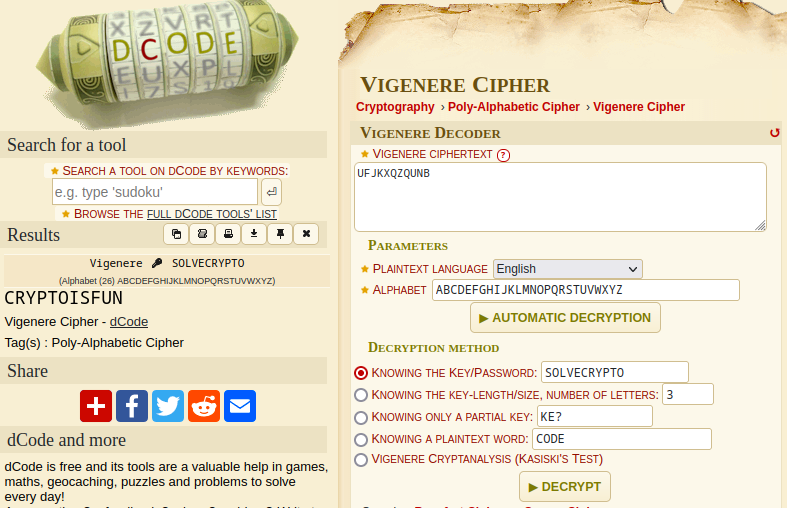

# Pixelated
I have these 2 images, can you make a flag out of them? scrambled1.png scrambled2.png

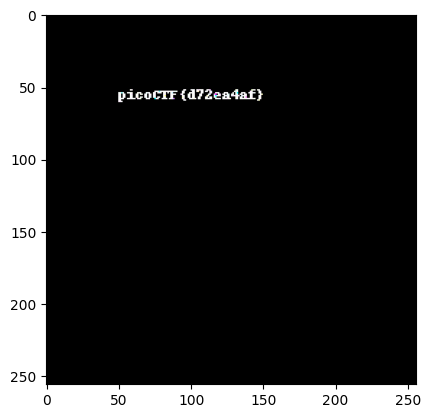

In [6]:
from PIL import Image
import numpy as np

# Re-initialize the images after the reset
image1_path = '/content/scrambled1.png'
image2_path = '/content/scrambled2.png'
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# Convert images to numpy arrays
image1_array = np.array(image1)
image2_array = np.array(image2)

# Perform an element-wise XOR operation between the two images
result_array_xor = np.bitwise_xor(image1_array, image2_array)

# Change pure white (255, 255, 255) to black (0, 0, 0)
# Pure white in an 8-bit image would be where all color channels are 255
white_pixels = np.all(result_array_xor == [255, 255, 255], axis=-1)
result_array_xor[white_pixels] = [0, 0, 0]

# Convert the result to an image
result_image_xor = Image.fromarray(result_array_xor)

# Save the resulting image
result_image_xor_path = '/content/result_image_xor.png'
result_image_xor.save(result_image_xor_path)

# show image
import matplotlib.pyplot as plt
plt.imshow(plt.imread(result_image_xor_path))
plt.show()


# No Padding, No Problem

In [ ]:
n = 63637470191883619326024038620697940847656220818355745974968764627733770425443135058925227147920107754026296075908261851787887249516029727419685193327522213061913548344706552686470761914093582499876576452884898507374567217604374752217714292768178977374607977765216747837733640331240885146038536114695629153961
e = 65537
c = 2643193102851335012951609360087746509885832683019765552483562739785232919961422747370867298657197607707811226101036282576873766704362809535471096036836242595749864174322097248276615110426235117034710571867800778822707575846027333231274468137096187537511435096564973771635857442537021960173352630723026152370
m2 = 2 # any integer
x = pow(m2, e, n) # encrypt(m2) = m2^e % n

# encrypt(m1) * encrypt(m2) = encrypt(m1 * m2)
C = c * x

print(f"Decript in the oracle: {C} ")
# decrypt C using oracle since we dont know d to do it manually
P = int(input('Decrypted C: '))

# P / m2 = m
m = P // m2
m = bytearray.fromhex(format(m, 'x')).decode() #hex to ascii
print('*'*60)
print(f'm = {m}')


Decript 94962488803158160056330385632259120967483305490657644084776334765286379582197607280802257178567735612222403606977553095760122892739763390023603400784538436963437245619959192739472626881575469767265851756078943330689948536316355040264793277847374805763092766636075440586199897084389547961520322588299916139817198774378331137210693619643048018631876939520354458914267022956283837569730179587806980218380429682152274553589127248517276597009846974221190291411045363425781262259316463774959049125291953539029756278320902382018155620300076132054881040887416313694013118433711469771644450485805252648043455639123046722910 in the oracle
Decrypted C: 580550060391700078946913236734911770139931497702556153513487440893406629034802718534645538074938502890769138695361576199930
************************************************************
m = picoCTF{m4yb3_Th0se_m3s54g3s_4r3_difurrent_3279013}
